# VAR

In [1]:
# To make realitve imports work
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
 
# actual imports
from src.constants import YEARS, FIG_DIR, COL_STUDENT, COL_SALARY, COL_STUDENT_PRED, COL_SALARY_PRED, COURSES, SECTORS
from src.dataLoading import getAllCourses, getTotalStudentsFor, getSalaries, getGraduatesInBwFor, getAllGraduatesYears, getInflationAdjustedBruttoSalary, getInflationAdjustedBruttoSalaries
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from tueplots import bundles
import pandas as pd

### Load data
Load the data for all three time-series.
Values range form 2007 to 2021 (inlcuding). This is limited by the salary data.

Load enrolled students for specified courses.

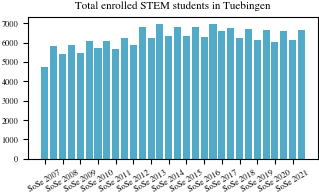

In [2]:
interestingYears = YEARS[3:-4]

totalStudents = getTotalStudentsFor(courses = COURSES, years = interestingYears)

# Plotting
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.bar(interestingYears, totalStudents, color=COL_STUDENT)
plt.xticks(ticks=interestingYears[::2], rotation=30)
plt.title(f'Total enrolled STEM students in Tuebingen')
plt.show()

Load inflation adjusted brutto salary data for specified sector.

Create cummulative inflation:
2.3 -> 1.023
2.8 -> 1.051644
0.2 -> 1.053747288
1.1 -> 1.065338508168
2.5 -> 1.0919719708722
2.2 -> 1.1159953542313885
1.6 -> 1.1338512798990907
0.8 -> 1.1429220901382835
0.7 -> 1.1509225447692513
0.4 -> 1.1555262349483282
1.7 -> 1.1751701809424497
1.9 -> 1.1974984143803562
1.4 -> 1.2142633921816812
0.4 -> 1.219120445750408
3.2 -> 1.258132300014421

Adjust salary for inflation:
3798.0 -> 3712.609970674487
3818.5 -> 3732.649071358749
3905.0 -> 3713.2337559097946
3951.5 -> 3757.4502398149943
4001.5 -> 3797.4000460725265
4072.5 -> 3864.7786299213703
4093.0 -> 3841.971325187983
4108.0 -> 3856.051356919676
4194.0 -> 3840.7579240793984
4268.5 -> 3908.9831184866266
4365.5 -> 3911.754635400449
4488.5 -> 4021.9701479773025
4474.0 -> 3945.8437621538624
4500.5 -> 3969.2154339681397
4554.5 -> 3984.961039163173
4653.0 -> 4071.1436415031826
4724.0 -> 4104.533377567224
4799.5 -> 4170.132926679486
4769.0 -> 4127.123950771447
4849.5 -> 4196.789179967736
4905.5 -> 4174.2890

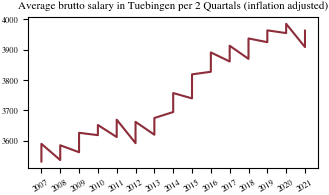

In [3]:
inflationAdjasutedBruttosalary = getInflationAdjustedBruttoSalaries(SECTORS)
salaries = getSalaries()
salary_YEARS = salaries.index.levels[1]

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.plot(salary_YEARS.repeat(2), inflationAdjasutedBruttosalary, color=COL_SALARY)
plt.xticks(ticks=salary_YEARS, rotation=30)
plt.title('Average brutto salary in Tuebingen per 2 Quartals (inflation adjusted)')
plt.show()

/Users/abdallahabdul-latif/Desktop/Universität Tübingen/5.Semester/Data Literacy/Neuer Ordner/AnalysingStudentDevelopment/src/dataLoading.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '56919.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  graduatesInBW.loc[2012, ('Abiturienten insg', 'Anzahl')] = newVal + diff / 4
/Users/abdallahabdul-latif/Desktop/Universität Tübingen/5.Semester/Data Literacy/Neuer Ordner/AnalysingStudentDevelopment/src/dataLoading.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '56919.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  graduatesInBW.loc[2012, ('Abiturienten insg', 'Anzahl')] = newVal + diff / 4


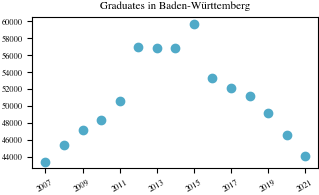

In [4]:
years = getAllGraduatesYears()
years = years[37:52]
graduatesInBW = getGraduatesInBwFor(years = years)


plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.scatter(years, graduatesInBW, color=COL_STUDENT)
plt.xticks(ticks=years[::2], rotation=30)
plt.title('Graduates in Baden-Württemberg')
plt.show()

### Simple VAR-Modell for one subject, with data per semester

The data ranges from 2007 to (including) 2021.
Limited by the salary data.

In [5]:
PAST_STEPS = 4
PREDICTION_STPES = 10
data = np.column_stack((totalStudents, inflationAdjasutedBruttosalary, graduatesInBW.repeat(2)))
completeDataDF = pd.DataFrame(data, index = YEARS[3:-4], columns = ['students', 'salary', 'graduates'])
model = VAR(completeDataDF)

results = model.fit(maxlags=PAST_STEPS)
# Forecasting
lagged_values = data[-PAST_STEPS:]  # Use the last available values as lagged values
forecast = results.forecast(lagged_values, steps=PREDICTION_STPES)
print(forecast)

[[ 5953.72520117  3893.81439035 42820.4307364 ]
 [ 6461.78612763  3928.36958406 44448.3556971 ]
 [ 5714.90977348  3874.50412074 43882.75225456]
 [ 6328.64754993  3916.25347428 44471.38629041]
 [ 5759.73450253  3852.86461841 43607.27698591]
 [ 6439.06023298  3892.13106286 43880.10267547]
 [ 5816.61869914  3823.19320511 43110.5073568 ]
 [ 6429.22860998  3860.19736337 44049.46671021]
 [ 5737.51016756  3797.30647584 44124.41180188]
 [ 6343.71649653  3840.91649846 45378.21680111]]


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


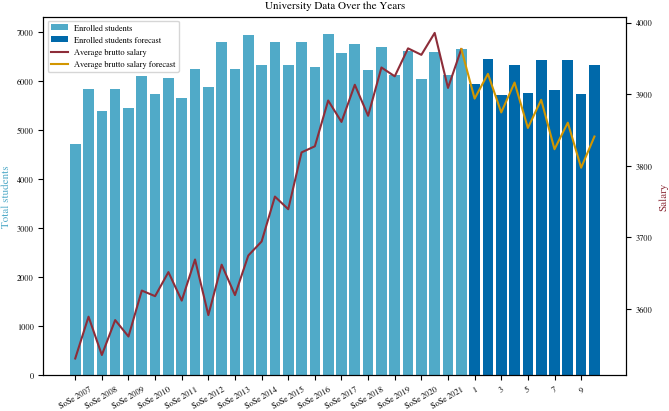

In [6]:
dataWithForecast = np.vstack((data, forecast))
yearsWithForecast = np.append(interestingYears, [f"{i+1}" for i in range(PREDICTION_STPES)])

plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1, usetex=False))
fig, ax1 = plt.subplots()
plt.title('University Data Over the Years')
plt.xticks(rotation=30)


ax1.set_ylabel('Total students', color=COL_STUDENT)
# Plot main data
ax1.bar(yearsWithForecast[:-len(forecast)], dataWithForecast[:-len(forecast), 0], color=COL_STUDENT, label='Enrolled students')

# Plot forecast with a different color
ax1.bar(yearsWithForecast[-len(forecast):], dataWithForecast[-len(forecast):, 0], color=COL_STUDENT_PRED, label='Enrolled students forecast')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Salary', color=COL_SALARY)

# Plot main data
ax2.plot(yearsWithForecast[:-len(forecast)], dataWithForecast[:-len(forecast), 1], color=COL_SALARY, label='Average brutto salary')

# Plot forecast with a different color
ax2.plot(yearsWithForecast[-len(forecast) - 1:], dataWithForecast[-len(forecast) - 1:, 1], color=COL_SALARY_PRED, label='Average brutto salary forecast')

# Create one legend for both subplots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Get current ticks, keep only every second tick
locs, labels = plt.xticks()
plt.xticks(locs[::2], labels[::2])

plt.savefig(FIG_DIR + '/predictingStudents.pdf')
plt.show()